In [ ]:
"""
モンテカルロシミュレーションによって、ROIの期待値と標準偏差を計算し、ある不確実な問題について論理的に考えることができる　。
繰り返しシミュレーションを実行し、ROIの期待値を算出する。

ROI：　（投資から得た利益 - 投資費用) / 投資費用
95%信頼区間： 平均値から両側に標準偏差の1.96倍まで離れた区間
"""

In [ ]:
"""
標本抽出(Sampling)と信頼区間(Confidence Interval)

標本＝母集団(Population)から分析のために無作為に抽出された部分集合

# 標本抽出方法
確率抽出(Probability Sampling)＝母集団の各要素が標本に含まれている確率がゼロではない
単純無作為標本(Simple Random Sample)＝確率抽出の一種
層別抽出(Stratified Sampling)＝標本が母集団全体を代表している可能性を高めるために母集団を層に分割した上で抽出する

# 大数の法則
標本サイズが大きくなるほど標本の平均と標準偏差が、母集団の平均と標準偏差に近づく

# 参考
https://bellcurve.jp/statistics/glossary/3538.html
"""

In [5]:
def variance(X):
    mean = sum(X)/len(X)
    tot = 0.0
    for x in X:
        tot += (x-mean)**2
    return tot/len(X)

def stdDev(X):
    return variance(X)**0.5


In [30]:
# ボストンマラソンデータの読み込み

def getBMData(filename):
    """Read CSV File. The elements are as followes.
    0. name, 1. gender, 2. age, 3. division(run or wheelchair), 4. country, 5. time
    return value: dictionary of the 6 value's list
    """
    data = {}
    f = open(filename)
    line = f.readline()
    data['name'], data['gender'], data['age'] = [], [], []
    data['division'], data['country'], data['time'] = [], [], []
    while line != '':
        split = line.split(',')
        data['name'].append(split[0])                                                                                                                                                                                                                 
        data['gender'].append(split[1])
        data['age'].append(split[2])
        data['division'].append(split[3])
        data['country'].append(split[4])
        data['time'].append(float(split[5][:-1])) # remove \n
        line = f.readline()
    f.close()
    return data

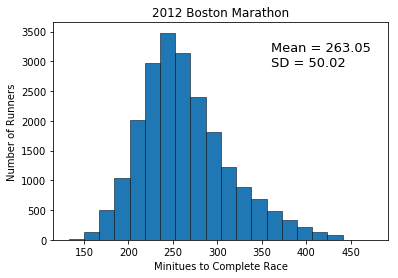

In [29]:
# マラソンの参加者全員のフィニッシュタイムのヒストグラムを作成する

import matplotlib.pylab as pylab

def makeHist(data, bins, title, xLabel, yLabel):
    pylab.hist(
        data,
        bins,
        edgecolor='black',
        linewidth=0.5)
    pylab.title(title)
    pylab.xlabel(xLabel)
    pylab.ylabel(yLabel)
    mean = sum(data)/len(data)
    std = stdDev(data)
    pylab.annotate(
        'Mean = {0}\nSD = {1}'.format(
            str(round(mean, 2)), 
            str(round(std, 2))),
        fontsize=13,
        xy=(0.65, 0.8),
        xycoords = 'axes fraction')

times = getBMData('./bm_results2012.txt')['time']
makeHist(times, 20, '2012 Boston Marathon', 'Minitues to Complete Race', 'Number of Runners')
    

In [42]:
# 無作為に抽出した標本（単純無作為標本）の平均フィニッシュタイムのヒストグラムを出力する

import random

def sampleTimes(times, numExamples):
    """
    times: assume as a list of float values that represent the times of every runners
    numExamples: assume as a int value
    create random sample the size of numExamples and create histgram that displays means, std devs, and distribution
    """
    sample = random.sample(times, numExamples)
    makeHist(sample, 10, 'Sample of Size ' + str(numExamples), 'Minutes to Complete Race', 'Number of Runners')


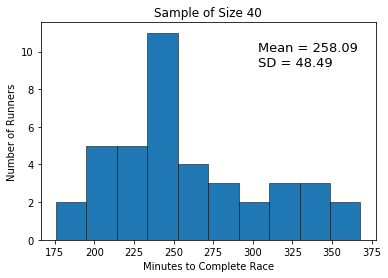

In [43]:
sampleSize = 40
sampleTimes(times, sampleSize)

Mean of rolling 1 die =  2.5008 Variance = 2.0863
Mean of rolling 100 dice =  2.4999 Variance = 0.0204


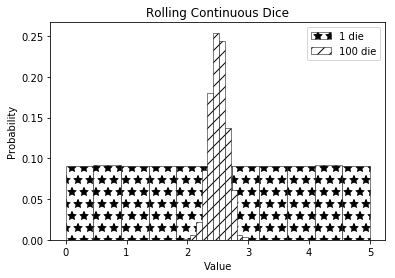

In [26]:
"""標本サイズはどれくらい大きければ良いか？
それは母集団の分散に依存する。分散が大きいほど、多くの標本が必要となる。

[中心極限定理(Central Limit Theorem)]
・同じ母集団から抽出された標本サイズが十分い大きいと標本の平均（標本平均）はおおよそ正規分布に従う
・この正規分布の平均は母集団の平均に非常に近い
・標本平均の分散は、母集団の分散を標本サイズで割ったものに非常に近い
"""

"""
中心極限定理の例

サイコロを何度も振るシミュレーションを実施し、平均と分散を表示し、出た数字の範囲の確率を示すヒストグラムをプロットする。
"""

import random
import matplotlib.pylab as pylab

def plotMeans(numDicePerTrial, numDiceThrown, numBins, legend, color, style):
  means = []
  numTrials = numDiceThrown//numDicePerTrial
  for i in range(numTrials):
    vals = 0 
    for j in range(numDicePerTrial):
      vals += 5*random.random()
    means.append(vals/numDicePerTrial)
  pylab.hist(means, bins=numBins, color = color, label = legend,
            # y軸の値を各階級の絶対値ではなく、相対的なビンの大きさになるようスケーリングする（合計1となる配列を渡す)
            weights = pylab.array(len(means) * [1])/len(means),
            hatch = style, edgecolor='black', linewidth=0.5)
  return sum(means)/len(means), variance(means)
  
mean, var = plotMeans(1, 1000000, 11, '1 die', 'w', '*')
print('Mean of rolling 1 die = ', round(mean, 4), 
      'Variance =', round(var, 4)) 
mean, var = plotMeans(100, 100000, 11, '100 die', 'w', '//')
print('Mean of rolling 100 dice = ', round(mean, 4), 
      'Variance =', round(var, 4)) 
pylab.title('Rolling Continuous Dice')
pylab.xlabel('Value')                                                                                                                                                                                                                         
pylab.ylabel('Probability')
pylab.legend()

"""
標本平均の確率分布は正規分布で、頂上が期待した平均（母集団の平均)になっている。
標本平均の分散2は、母集団の平均の分散を標本数で割った値0.2に非常に近い。
全てが中心極限定理で予測された通りである。
"""


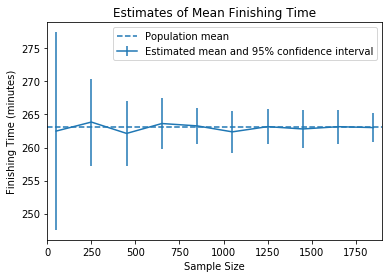

In [46]:
# 中心極限定理2

times = getBMData('bm_results2012.txt')['time']
meanOfMeans, stdOfMeans = [], []
sampleSizes = range(50, 2000, 200)
for sampleSize in sampleSizes:
    sampleMeans = []
    for t in range(20):
        sample = random.sample(times, sampleSize)
        sampleMeans.append(sum(sample)/sampleSize)
    meanOfMeans.append(sum(sampleMeans)/len(sampleMeans))
    stdOfMeans.append(stdDev(sampleMeans))
pylab.errorbar(sampleSizes, meanOfMeans,
        yerr = 1.96 * pylab.array(stdOfMeans),
        label = 'Estimated mean and 95% confidence interval')
pylab.xlim(0, max(sampleSizes) + 50) 
pylab.axhline(sum(times)/len(times), linestyle = '--',
        label='Population mean')
pylab.title('Estimates of Mean Finishing Time')
pylab.xlabel('Sample Size')
pylab.ylabel('Finishing Time (minutes)')                                                                                                                                                                                                      
pylab.legend(loc = 'best')


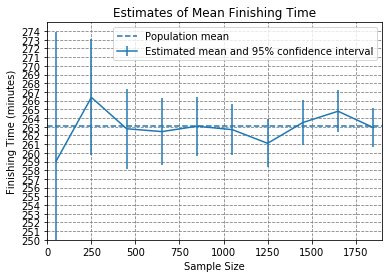

In [98]:
"""標準誤差は同じ母集団から無限回数、標本サイズnの標本の平均をとったときの標準偏差である。
標準誤差は、中心極限定理を式変換することにより、次のようになる。
SE = σ(母集団の標準偏差)/√n

一般的には、母集団の標準偏差はわからないので、その標本の標準偏差、つまり標本標準偏差を母集団の標準偏差の代表とみなしている。

[標準誤差]
https://bellcurve.jp/statistics/course/8616.html
https://rstudio-pubs-static.s3.amazonaws.com/11679_adccc810394c42d8b66e5fb2813212e3.html
https://ja.wikipedia.org/wiki/%E6%A8%99%E6%BA%96%E8%AA%A4%E5%B7%AE
https://atarimae.biz/archives/9881
"""

times = getBMData('bm_results2012.txt')['time']
sampleSizes = range(50, 2000, 200)
sampleMeans = []
sampleSes = []
for sampleSize in sampleSizes:
    sample = random.sample(times, sampleSize)
    sampleMean = sum(sample)/sampleSize
    sampleStd = stdDev(sample)
    se = sampleStd/sampleSize ** 0.5
    sampleMeans.append(sampleMean)
    sampleSes.append(se)

pylab.errorbar(sampleSizes, sampleMeans,
        yerr = 1.96*pylab.array(sampleSes),
        label = 'Estimated mean and 95% confidence interval')
pylab.xlim(0, max(sampleSizes) + 50) 
pylab.ylim(250, 275) 
pylab.axhline(sum(times)/len(times), linestyle = '--',
        label='Population mean')
pylab.title('Estimates of Mean Finishing Time')
pylab.xlabel('Sample Size')
pylab.ylabel('Finishing Time (minutes)')
pylab.yticks(range(250, 275, 1))
pylab.grid(which='major',color='gray',linestyle='--')
pylab.legend(loc = 'best')
